In [2]:
# import first packages
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/passwords/passwords.csv',sep=',')
df.head()

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0


In [4]:
# shape
df.shape

(507, 9)

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               500 non-null    float64
 1   password           500 non-null    object 
 2   category           500 non-null    object 
 3   value              500 non-null    float64
 4   time_unit          500 non-null    object 
 5   offline_crack_sec  500 non-null    float64
 6   rank_alt           500 non-null    float64
 7   strength           500 non-null    float64
 8   font_size          500 non-null    float64
dtypes: float64(6), object(3)
memory usage: 35.8+ KB


In [6]:
# describe
df.describe()

,rank,value,offline_crack_sec,rank_alt,strength,font_size
count,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000
mean,250.500000,5.602660,5.000096e-01,251.224000,7.432000,10.298000
std,144.481833,8.436005,2.658132e+00,145.052163,5.415536,3.651282
min,1.000000,1.290000,1.110000e-07,1.000000,0.000000,0.000000
25%,125.750000,3.430000,3.210000e-03,125.750000,6.000000,10.000000
50%,250.500000,3.720000,3.210000e-03,251.500000,7.000000,11.000000
75%,375.250000,3.720000,8.350000e-02,376.250000,8.000000,11.000000
max,500.000000,92.270000,2.927000e+01,502.000000,48.000000,28.000000


In [7]:
# check NAs
df.isna().sum()

rank                 7
password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
dtype: int64

In [8]:
# check duplicate
df.duplicated().value_counts()

False    501
True       6
dtype: int64

In [9]:
# see duplicates
df[df.duplicated(keep=False) == True]

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# remove NAs
df_new = df.dropna()
df_new.shape

(500, 9)

In [11]:
# check duplicate again
df_new.duplicated().value_counts()

False    500
dtype: int64

In [12]:
# check unique information
df_new.nunique()

rank                 500
password             500
category              10
value                 15
time_unit              7
offline_crack_sec     16
rank_alt             500
strength              22
font_size             19
dtype: int64

#### category -> qualitative variable

In [13]:
# frequency table
ft_category = df_new.groupby(['category']).size().reset_index()
ft_category.columns = ['category', 'Abs Freq']

# relative absolute frequency
ft_category['Rel Abs Freq'] = round(ft_category['Abs Freq']/ft_category['Abs Freq'].sum(),2)*100

#acumulative absolute frequency
ft_category['Ac Abs Freq'] = [0]*ft_category.shape[0]
freq_ac=0
for i, j in enumerate(ft_category['Abs Freq']):
    freq_ac = j + freq_ac
    ft_category['Ac Abs Freq'][i] = freq_ac
    
# relative acumulative absolute frequency
ft_category['Rel Ac Abs Freq'] = [0]*ft_category.shape[0]
freqr_ac=0
for i, j in enumerate(ft_category['Rel Abs Freq']):
    freqr_ac = j + freqr_ac
    ft_category['Rel Ac Abs Freq'][i] = freqr_ac

ft_category

/tmp/ipykernel_32/647262215.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft_category['Ac Abs Freq'][i] = freq_ac
/tmp/ipykernel_32/647262215.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft_category['Rel Ac Abs Freq'][i] = freqr_ac


,category,Abs Freq,Rel Abs Freq,Ac Abs Freq,Rel Ac Abs Freq
0,animal,29,6.0,29,6
1,cool-macho,79,16.0,108,22
2,fluffy,44,9.0,152,31
3,food,11,2.0,163,33
4,name,183,37.0,346,70
5,nerdy-pop,30,6.0,376,76
6,password-related,15,3.0,391,79
7,rebellious-rude,11,2.0,402,81
8,simple-alphanumeric,61,12.0,463,93
9,sport,37,7.0,500,100


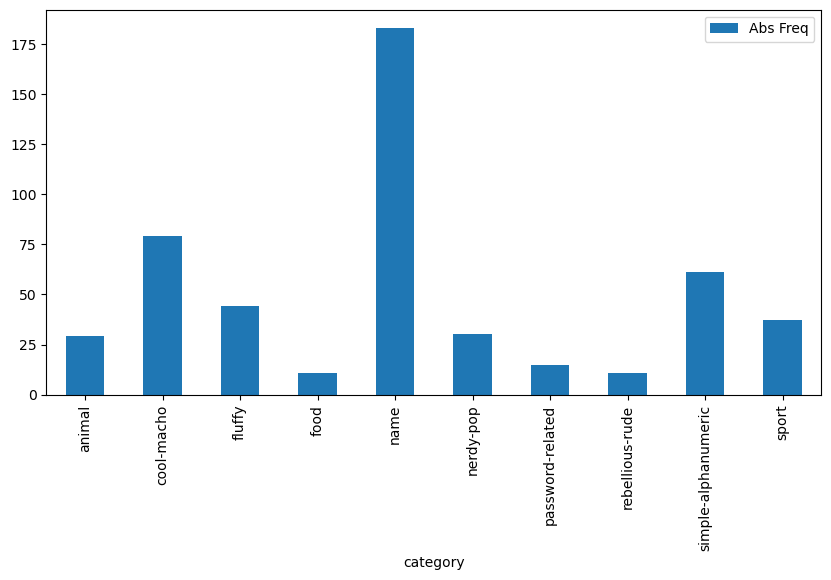

In [14]:
# bar plot
ax = ft_category.plot.bar(x='category', y='Abs Freq', linewidth=1, figsize=(10, 5))

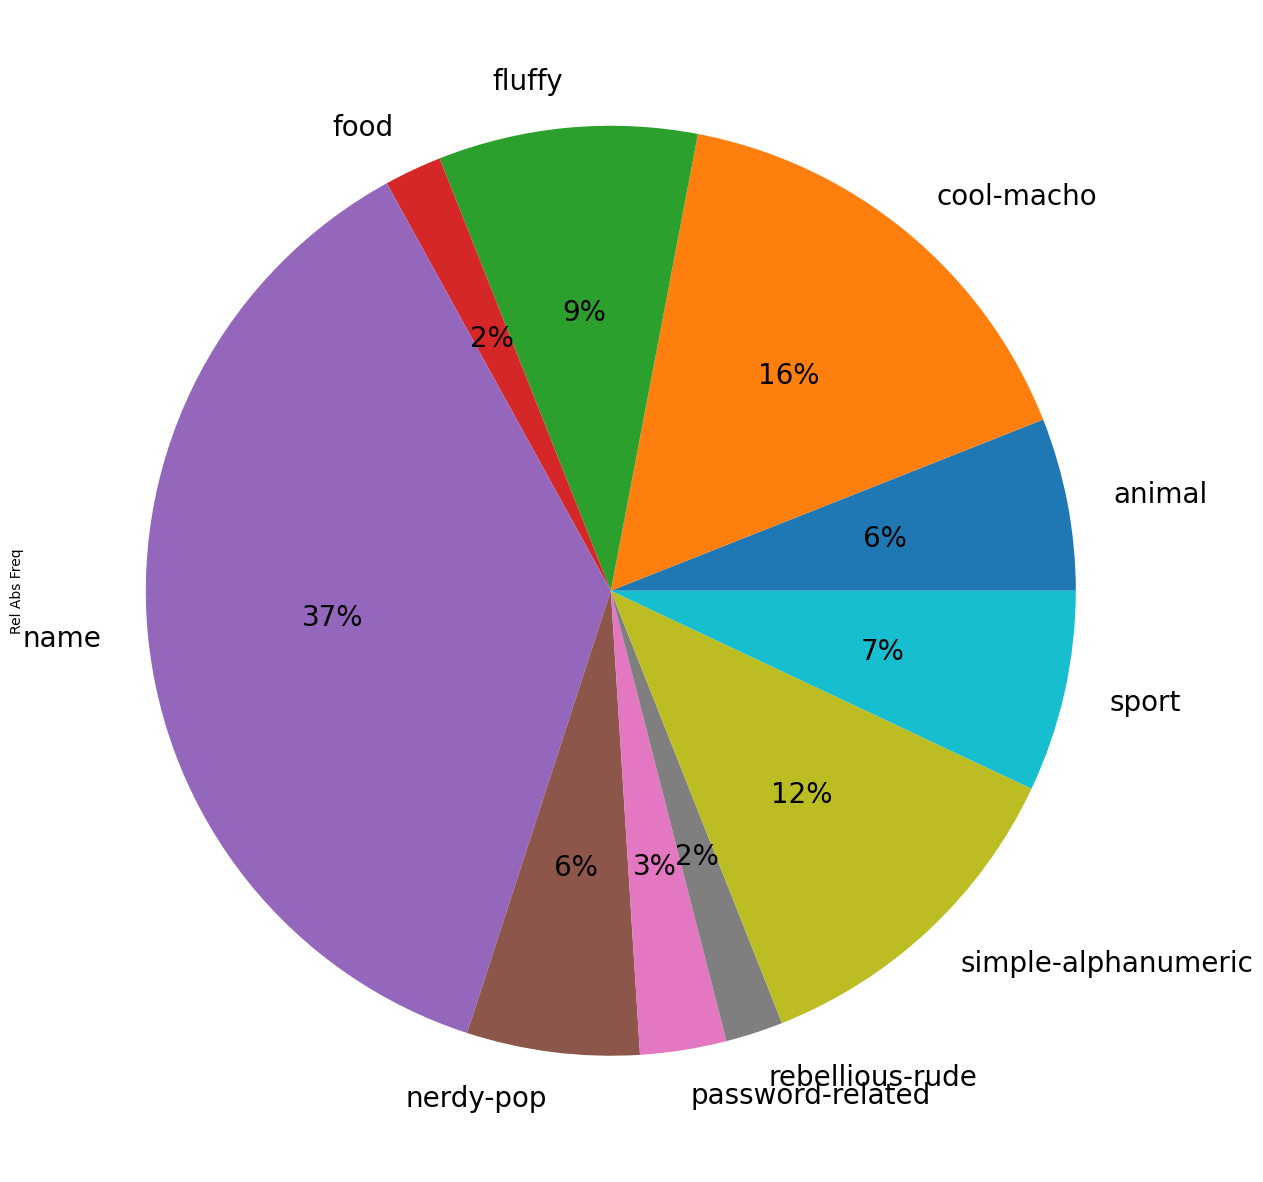

In [43]:
# pie plot
plot = ft_category.plot.pie(y='Rel Abs Freq', figsize=(15, 20), autopct="%.0f%%", fontsize=20,labels=ft_category['category'].values)
plot.get_legend().remove()

In [16]:
# pareto plot
bar_plot = df_new['category'].value_counts().reset_index()
bar_plot['cumperc'] = bar_plot['category'].cumsum()/bar_plot['category'].sum()*100
bar_plot

,index,category,cumperc
0,name,183,36.6
1,cool-macho,79,52.4
2,simple-alphanumeric,61,64.6
3,fluffy,44,73.4
4,sport,37,80.8
5,nerdy-pop,30,86.8
6,animal,29,92.6
7,password-related,15,95.6
8,food,11,97.8
9,rebellious-rude,11,100.0


In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

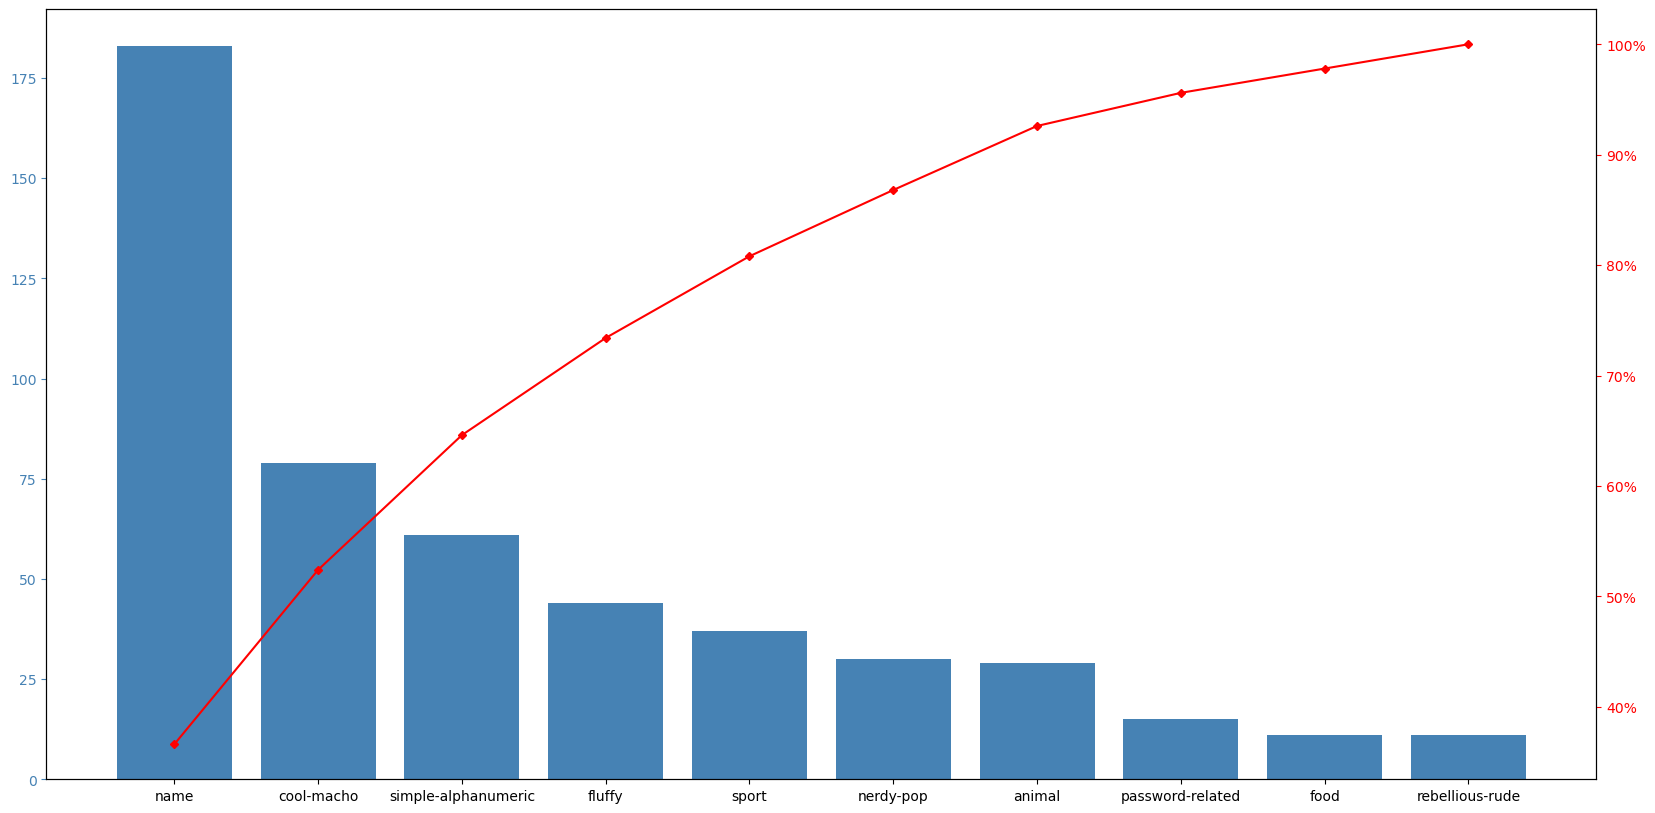

In [18]:
#define details for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(bar_plot['index'], bar_plot['category'], color = color1, linewidth=10)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(bar_plot['index'], bar_plot['cumperc'],marker="D", color = color2, ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#### strength -> quantitative variable


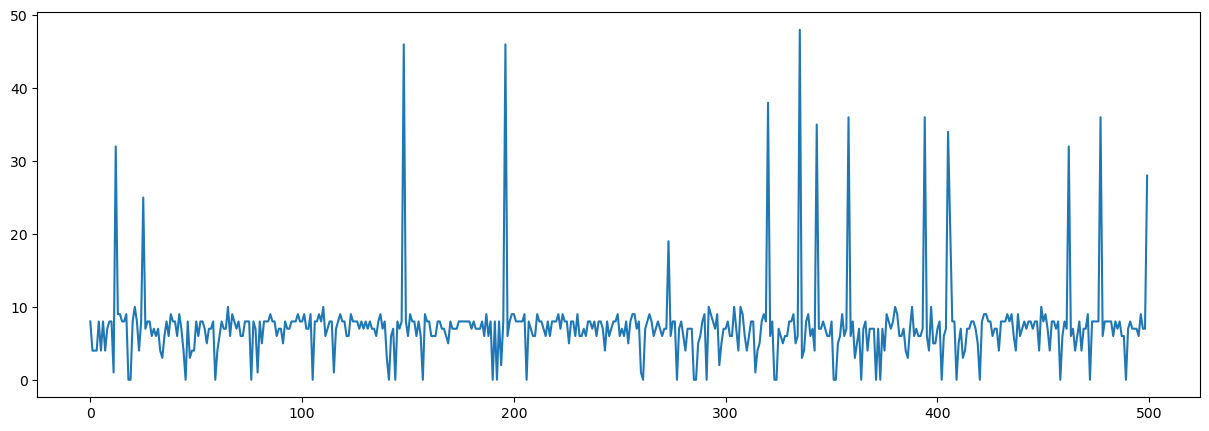

In [20]:
# line plot
df_new['strength'].plot.line(figsize=(15,5));

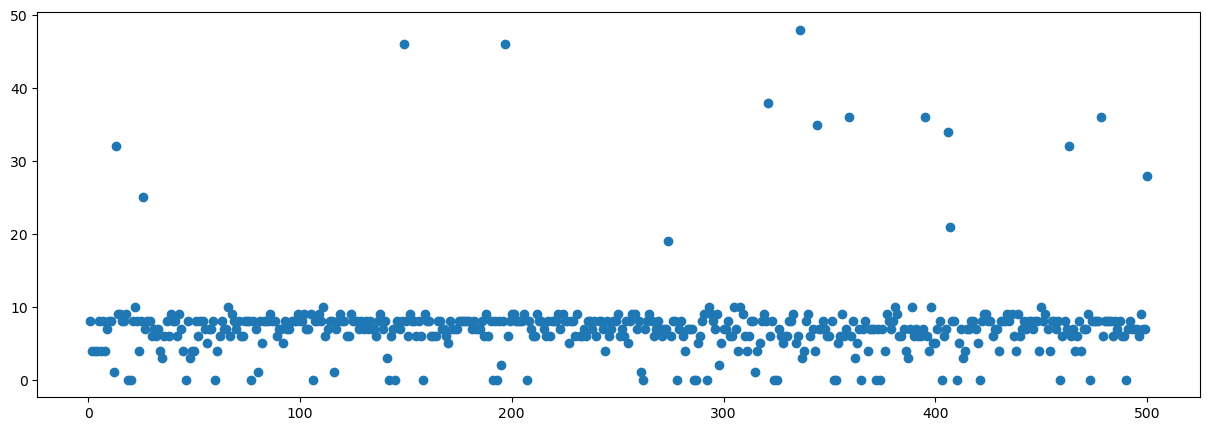

In [21]:
# scatter plot
plt.figure(figsize=(15,5))
x = range(1,501,1)
plt.scatter(x=x, y = df_new['strength']);

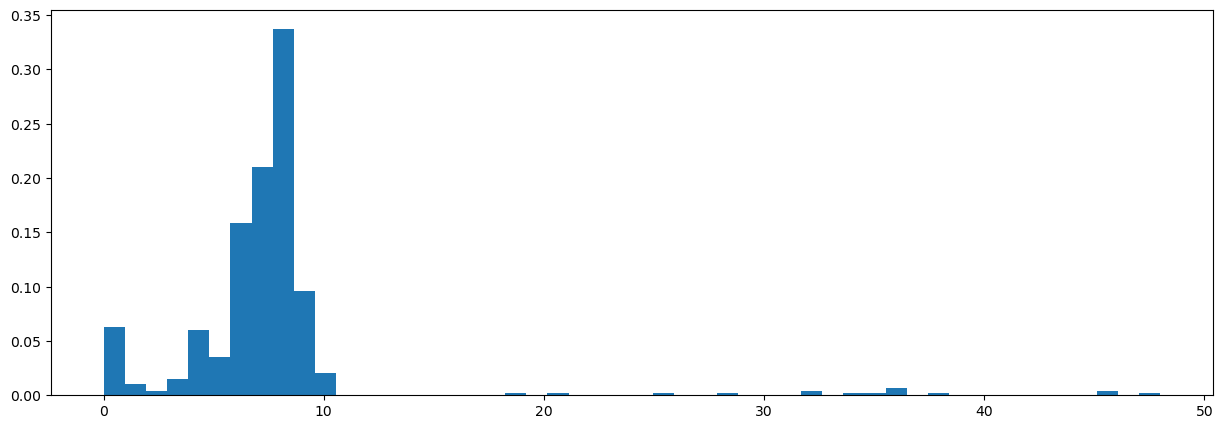

In [22]:
# histogram
plt.figure(figsize=(15,5))
plt.hist(df_new['strength'], bins=50,density=True);

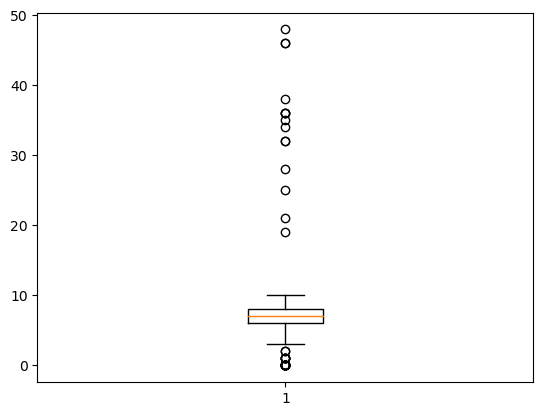

In [23]:
# boxplot
bplots = plt.boxplot(df_new['strength'])

In [24]:
# strength details 
df_new['strength'].describe()

count    500.000000
mean       7.432000
std        5.415536
min        0.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       48.000000
Name: strength, dtype: float64

In [25]:
((df_new['strength'] > 10) == True).value_counts()

False    485
True      15
Name: strength, dtype: int64

In [26]:
df_new2 = df_new[df_new['strength'] <= 10]
df_new2['strength'].value_counts()

8.0     162
7.0     101
6.0      76
9.0      46
0.0      30
4.0      29
5.0      17
10.0     10
3.0       7
1.0       5
2.0       2
Name: strength, dtype: int64

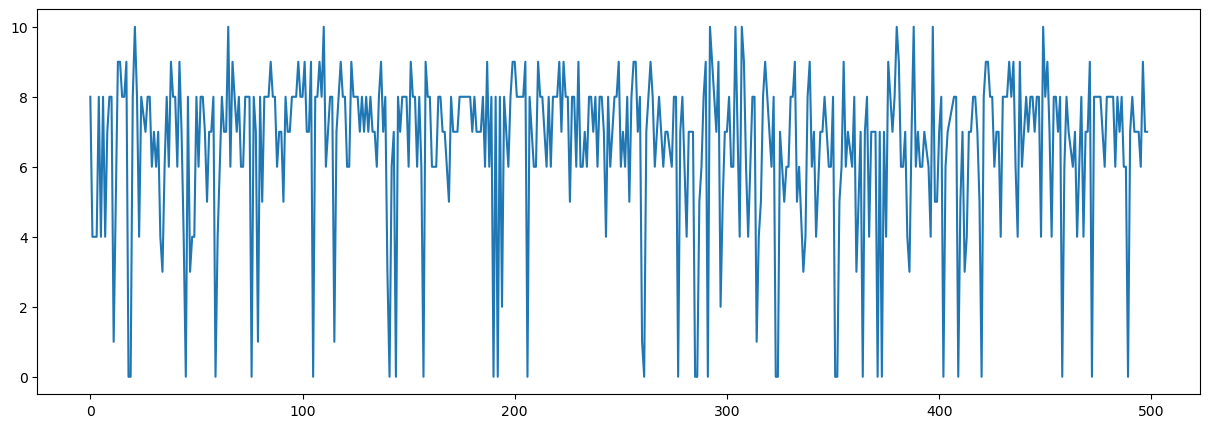

In [28]:
# line plot
df_new2['strength'].plot.line(figsize=(15,5));

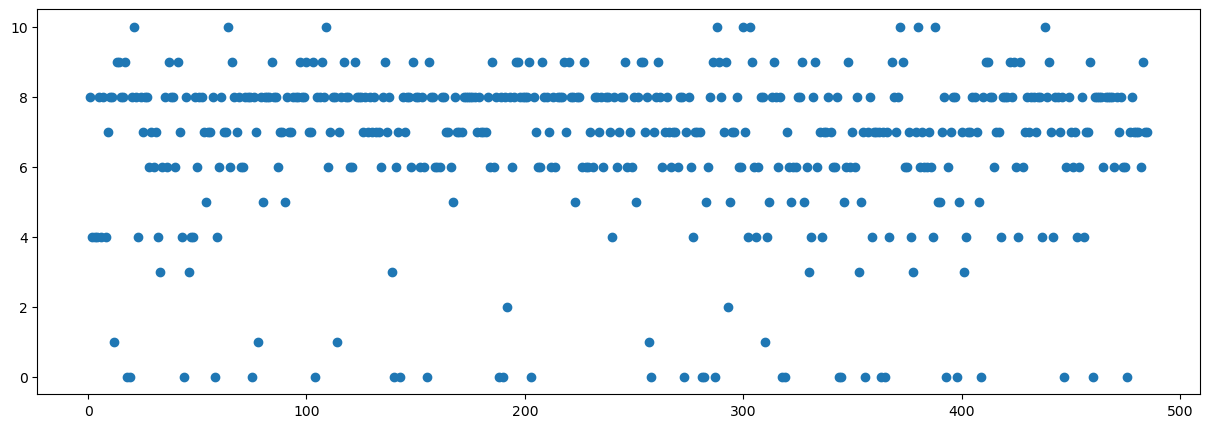

In [29]:
# scatter plot
plt.figure(figsize=(15,5))
x = range(1,501-15,1)
plt.scatter(x=x, y = df_new2['strength']);

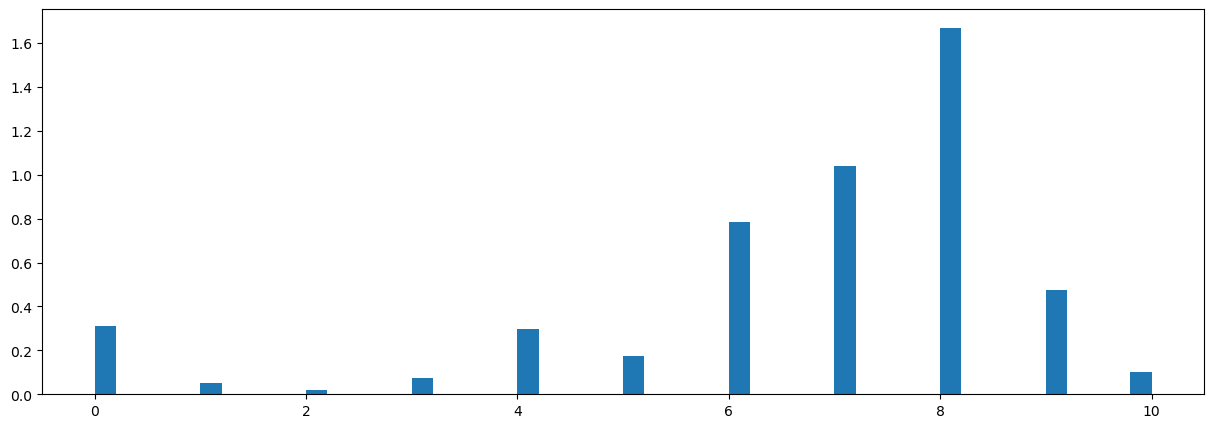

In [30]:
# histogram
plt.figure(figsize=(15,5))
plt.hist(df_new2['strength'], bins=50,density=True);

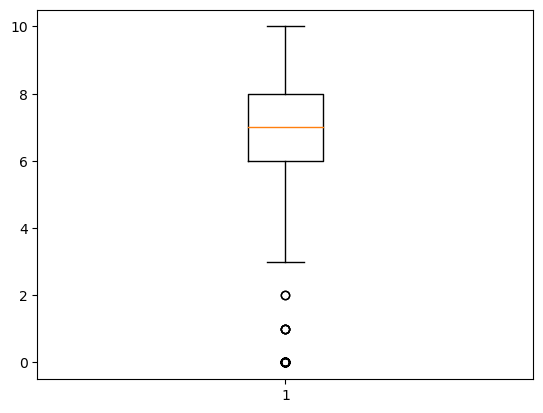

In [31]:
# boxplot
bplots = plt.boxplot(df_new2['strength'])

In [32]:
# passwords with strength == 10
strengthHigh = df_new[df_new['strength'] == 10]
strengthHigh.shape

(10, 9)

In [33]:
groupHigh = strengthHigh.groupby(['category','password'])
groupHigh.first()

rank  value time_unit  offline_crack_sec  \
category            password                                              
animal              dolphins  308.0   6.91     years               2.17   
cool-macho          lifehack  381.0   6.91     years               2.17   
                    maverick  111.0   6.91     years               2.17   
                    platinum  389.0   6.91     years               2.17   
name                garfield  398.0   6.91     years               2.17   
                    nicholas  293.0   6.91     years               2.17   
                    superman   22.0   6.91     years               2.17   
nerdy-pop           computer   66.0   6.91     years               2.17   
simple-alphanumeric qwertyui  305.0   6.91     years               2.17   
sport               redwings  450.0   6.91     years               2.17   

                              rank_alt  strength  font_size  
category            password                                 
animal              dolphins     309.0      10.0       13.0  
cool-macho          lifehack     382.0      10.0       13.0  
                    maverick     111.0      10.0       13.0  
                    platinum     390.0      10.0       13.0  
name                garfield     399.0      10.0       13.0  
                    nicholas     294.0      10.0       13.0  
                    superman      22.0      10.0       13.0  
nerdy-pop           computer      66.0      10.0       13.0  
simple-alphanumeric qwertyui     306.0      10.0       13.0  
sport               redwings     452.0      10.0       13.0

In [34]:
# passwords with strength == 1
strengthLow = df_new[df_new['strength'] == 1]
strengthLow.shape

(5, 9)

In [35]:
groupLow = strengthLow.groupby(['category','password'])
groupLow.first()

rank  value time_unit  offline_crack_sec  \
category            password                                              
name                bubba     261.0   3.43     hours       1.240000e-04   
simple-alphanumeric 121212     80.0  18.52   minutes       1.110000e-05   
                    131313    116.0  18.52   minutes       1.110000e-05   
                    2112      315.0  11.11   seconds       1.110000e-07   
                    696969     12.0  18.52   minutes       1.110000e-05   

                              rank_alt  strength  font_size  
category            password                                 
name                bubba        262.0       1.0        4.0  
simple-alphanumeric 121212        80.0       1.0        4.0  
                    131313       116.0       1.0        4.0  
                    2112         316.0       1.0        4.0  
                    696969        12.0       1.0        4.0

In [36]:
# passwords with strength > 10
strengthHighout = df_new[df_new['strength'] > 10]
strengthHighout.shape

(15, 9)

In [37]:
groupHighout = strengthHighout.groupby(['category','password'])
groupHighout.first()

rank  value time_unit  offline_crack_sec  \
category            password                                              
nerdy-pop           8675309   274.0   3.09     hours           0.000111   
                    bond007   321.0   2.56     years           0.806000   
                    ncc1701   149.0   2.56     years           0.806000   
                    ou812     359.0  17.28     hours           0.000622   
                    rush2112  336.0  92.27     years          29.020000   
                    thx1138   197.0   2.56     years           0.806000   
password-related    passw0rd  500.0  92.27     years          29.020000   
simple-alphanumeric 123abc    463.0   3.70     weeks           0.022400   
                    abc123     13.0   3.70     weeks           0.022400   
                    eagle1    407.0   3.70     weeks           0.022400   
                    heka6w2   395.0   2.56     years           0.806000   
                    red123    344.0   3.70     weeks           0.022400   
                    test123   478.0   2.56     years           0.806000   
                    trustno1   26.0  92.27     years          29.020000   
sport               jordan23  406.0  92.27     years          29.270000   

                              rank_alt  strength  font_size  
category            password                                 
nerdy-pop           8675309      275.0      19.0       17.0  
                    bond007      322.0      38.0       25.0  
                    ncc1701      149.0      46.0       27.0  
                    ou812        360.0      36.0       24.0  
                    rush2112     337.0      48.0       28.0  
                    thx1138      198.0      46.0       27.0  
password-related    passw0rd     502.0      28.0       21.0  
simple-alphanumeric 123abc       465.0      32.0       23.0  
                    abc123        13.0      32.0       23.0  
                    eagle1       408.0      21.0       18.0  
                    heka6w2      396.0      36.0       24.0  
                    red123       345.0      35.0       24.0  
                    test123      480.0      36.0       24.0  
                    trustno1      26.0      25.0       20.0  
sport               jordan23     407.0      34.0       23.0

In [38]:
# passwords with strength < 1
strengthHighout2 = df_new[df_new['strength'] < 1]
strengthHighout2.shape

(30, 9)

In [39]:
groupHighout2 = strengthHighout2.groupby(['category','password'])
groupHighout2.first()

rank  value time_unit  offline_crack_sec  \
category            password                                              
cool-macho          voodoo    324.0   3.72      days       3.210000e-03   
fluffy              booboo    142.0   3.72      days       3.210000e-03   
food                banana    158.0   3.72      days       3.210000e-03   
                    pepper     46.0   3.72      days       3.210000e-03   
name                hannah    191.0   3.72      days       3.210000e-03   
simple-alphanumeric 1111       77.0  11.11   seconds       1.110000e-07   
                    11111     410.0   1.85   minutes       1.110000e-06   
                    111111     19.0  18.52   minutes       1.110000e-05   
                    11111111  193.0   1.29      days       1.110000e-03   
                    112233    262.0  18.52   minutes       1.110000e-05   
                    2000       20.0  11.11   seconds       1.110000e-07   
                    2222      372.0  11.11   seconds       1.110000e-07   
                    222222    278.0  18.52   minutes       1.110000e-05   
                    232323    352.0  18.52   minutes       1.110000e-05   
                    333333    459.0  18.52   minutes       1.110000e-05   
                    4444      374.0  11.11   seconds       1.110000e-07   
                    555555    365.0  18.52   minutes       1.110000e-05   
                    666666     60.0  18.52   minutes       1.110000e-05   
                    69696969  403.0   1.29      days       1.110000e-03   
                    7777      325.0  11.11   seconds       1.110000e-07   
                    777777    287.0  18.52   minutes       1.110000e-05   
                    7777777   207.0   3.09     hours       1.110000e-04   
                    888888    490.0  18.52   minutes       1.110000e-05   
                    88888888  292.0   1.29      days       1.110000e-03   
                    999999    421.0  18.52   minutes       1.110000e-05   
                    aaaaaa    106.0   3.72      days       3.210000e-03   
                    xxxx      473.0   7.92   minutes       4.750000e-06   
                    xxxxxx    145.0   3.72      days       3.210000e-03   
                    xxxxxxxx  286.0   6.91     years       2.170000e+00   
                    zzzzzz    353.0   3.72      days       3.210000e-03   

                              rank_alt  strength  font_size  
category            password                                 
cool-macho          voodoo       325.0       0.0        0.0  
fluffy              booboo       142.0       0.0        0.0  
food                banana       158.0       0.0        0.0  
                    pepper        46.0       0.0        0.0  
name                hannah       192.0       0.0        0.0  
simple-alphanumeric 1111          77.0       0.0        0.0  
                    11111        411.0       0.0        0.0  
                    111111        19.0       0.0        0.0  
                    11111111     194.0       0.0        0.0  
                    112233       263.0       0.0        0.0  
                    2000          20.0       0.0        0.0  
                    2222         373.0       0.0        0.0  
                    222222       279.0       0.0        0.0  
                    232323       353.0       0.0        0.0  
                    333333       461.0       0.0        0.0  
                    4444         375.0       0.0        0.0  
                    555555       366.0       0.0        0.0  
                    666666        60.0       0.0        0.0  
                    69696969     404.0       0.0        0.0  
                    7777         326.0       0.0        0.0  
                    777777       288.0       0.0        0.0  
                    7777777      208.0       0.0        0.0  
                    888888       492.0       0.0        0.0  
                    88888888     293.0       0.0        0.0  
                  